Found 265 images belonging to 2 classes.
Found 53 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 51s 3s/step - accuracy: 0.4468 - loss: 1.4276 - val_accuracy: 0.5660 - val_loss: 0.6923
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 35s 87ms/step - accuracy: 0.6279 - loss: 0.6688 - val_accuracy: 0.6792 - val_loss: 0.6703
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.5296 - loss: 0.6756 - val_accuracy: 0.5660 - val_loss: 0.8900
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.6543 - loss: 0.6058 - val_accuracy: 0.6038 - val_loss: 0.7069
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7756 - loss: 0.4891 - val_accuracy: 0.7736 - val_loss: 0.5174
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.7990 - loss: 0.4619 - val_accuracy: 0.7547 - val_loss: 0.5098
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.8164 - loss: 0.4562 - val_accuracy: 0.7736 - val_loss: 0.4332
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.8103 - loss: 0.3965 - val_accuracy: 0.8113 - val_loss: 0.4183
Epoch 9/10

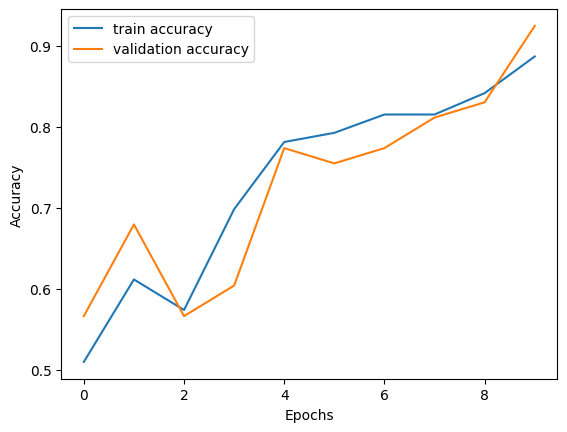

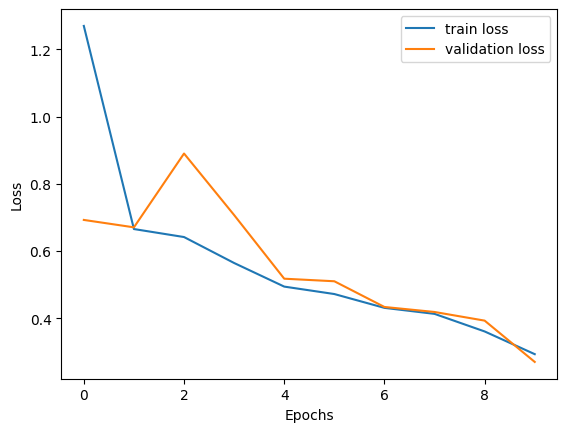

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.9184 - loss: 0.2793
Test Accuracy: 92.45%


error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [1]:
# Install necessary libraries (if not already installed)
!pip install tensorflow matplotlib

# Import required libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os

# # Mount Google Drive if dataset is stored there
# from google.colab import drive
# drive.mount('/content/drive')

# Define dataset paths
train_dir = '/content/drive/MyDrive/Colab_Notebooks/coconut_tree_dataset/train'
test_dir = '/content/drive/MyDrive/Colab_Notebooks/coconut_tree_dataset/test'

# Image parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Data Augmentation and Loading
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Model Architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

# Plot training and validation accuracy and loss
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Prediction on new test images and coconut count
import cv2

test_image_folder = '/content/drive/MyDrive/Colab_Notebooks/coconut_tree_dataset/test'

def predict_and_count_coconuts(folder_path):
    coconut_count = 0
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, IMG_SIZE)
        img = img / 255.0
        img = np.expand_dims(img, axis=0)

        # Prediction
        prediction = model.predict(img)
        class_label = 'Coconut' if prediction[0][0] > 0.5 else 'Non-Coconut'
        if class_label == 'Coconut':
            coconut_count += 1

        # Display the result
        plt.imshow(img[0])
        plt.title(f"{class_label}")
        plt.axis('off')
        plt.show()

    print(f"\nTotal Coconut Trees Detected: {coconut_count}")

predict_and_count_coconuts(test_image_folder)


In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def predict_and_count_coconuts(folder_path):
    coconut_count = 0
    supported_formats = (".jpg", ".jpeg", ".png")  # Add valid image formats

    for img_name in os.listdir(folder_path):
        # Skip non-image files
        if not img_name.lower().endswith(supported_formats):
            continue

        img_path = os.path.join(folder_path, img_name)

        # Check if the image path is valid
        img = cv2.imread(img_path)
        if img is None:
            print(f"Skipping unreadable file: {img_path}")
            continue

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, IMG_SIZE)
        img = img / 255.0
        img = np.expand_dims(img, axis=0)

        # Prediction
        prediction = model.predict(img)
        class_label = 'Non-Coconut' if prediction[0][0] > 0.5 else 'Coconut'
        if class_label == 'Coconut':
            coconut_count += 1

        # Display the result
        plt.imshow(img[0])
        plt.title(f"{class_label}")
        plt.axis('off')
        plt.show()

    print(f"\nTotal Coconut Trees Detected: {coconut_count}")

test_image_folder = '/content/drive/MyDrive/Colab_Notebooks/coconut_tree_dataset/test/coconut_trees'

predict_and_count_coconuts(test_image_folder)


Output hidden; open in https://colab.research.google.com to view.